<a href="https://colab.research.google.com/github/Prashanna-Raj-Pandit/NN-Time-series/blob/main/BitPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Activating GPU

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


# Load data

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2025-11-28 01:31:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2025-11-28 01:31:55 (7.30 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [3]:
import pandas as pd
df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates=["Date"],index_col=["Date"])
print(df.head())

           Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC            123.65499       124.30466       124.75166   
2013-10-02      BTC            125.45500       123.65499       125.75850   
2013-10-03      BTC            108.58483       125.45500       125.66566   
2013-10-04      BTC            118.67466       108.58483       118.67500   
2013-10-05      BTC            121.33866       118.67466       121.93633   

            24h Low (USD)  
Date                       
2013-10-01      122.56349  
2013-10-02      123.63383  
2013-10-03       83.32833  
2013-10-04      107.05816  
2013-10-05      118.00566  


In [4]:
df.describe()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
count,2787.000000,2787.000000,2787.000000,2787.000000
mean,6529.845141,6513.579485,6710.061683,6302.417386
std,10887.847444,10863.800772,11206.779756,10475.811252
min,108.584830,108.584830,118.675000,83.328330
25%,460.087500,459.400500,469.720995,450.818830
50%,2780.182500,2772.367500,2874.696250,2696.457500
75%,8506.923720,8496.887593,8763.291985,8221.060570
max,63346.789035,63562.673545,64801.787870,62094.632914


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [6]:
len(df)

2787

In [7]:
df=pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
df.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0, 0.5, 'Price')

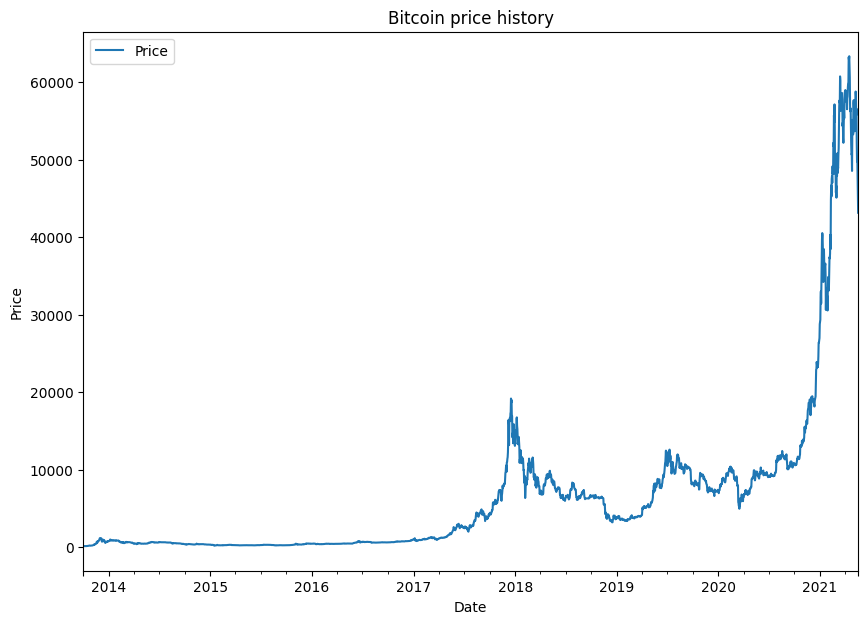

In [8]:
import matplotlib.pyplot as plt
df.plot(figsize=(10,7))
plt.title("Bitcoin price history")
plt.ylabel("Price")

## Train/Test split

In [9]:
# get the bitcoin data array
timesteps=df.index.to_numpy()
prices=df["Price"].to_numpy()

timesteps[:10],prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
split_size=int(0.8*len(df))
x_train,y_train=timesteps[:split_size],prices[:split_size]
len(x_train),len(y_train)

(2229, 2229)

In [11]:
x_test,y_test=timesteps[split_size:],prices[split_size:]
len(x_test),len(y_test)

(558, 558)

### Visualizing train and test data of timeseries

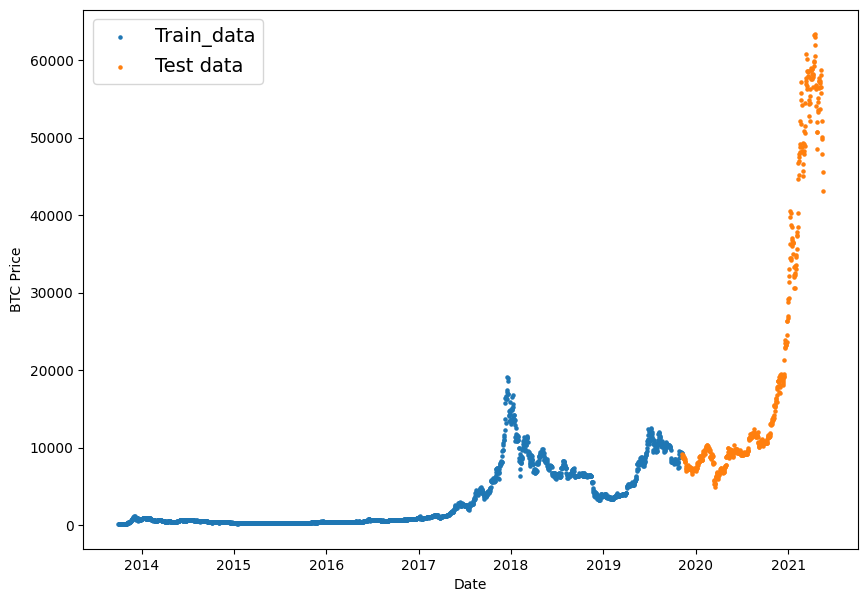

In [12]:
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,s=5,label="Train_data")
plt.scatter(x_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

## Create a plotting function

In [13]:
# A funtion to plot the timeseries data
def plot_time_series(timesteps,values, format=".", start=0,end=None,label=None):
  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

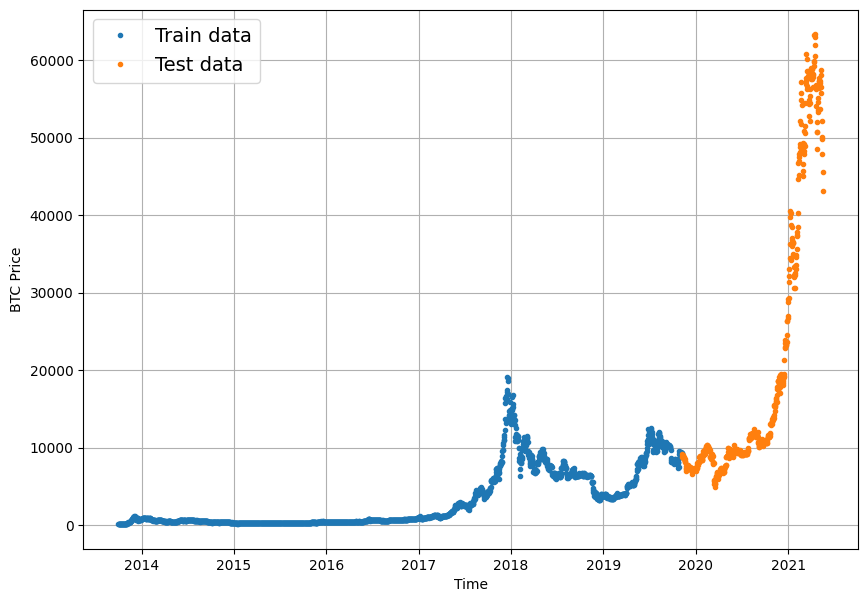

In [14]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_train,values=y_train,label="Train data")
plot_time_series(timesteps=x_test,values=y_test,label="Test data")

# Modeling Experiments

Training on univariate data- only one predictor (prices) is involved in the forcasting



## Naive Model

In [15]:
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [16]:
x_test[:10]

array(['2019-11-08T00:00:00.000000000', '2019-11-09T00:00:00.000000000',
       '2019-11-10T00:00:00.000000000', '2019-11-11T00:00:00.000000000',
       '2019-11-12T00:00:00.000000000', '2019-11-13T00:00:00.000000000',
       '2019-11-14T00:00:00.000000000', '2019-11-15T00:00:00.000000000',
       '2019-11-16T00:00:00.000000000', '2019-11-17T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [17]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

In [18]:
import tensorflow as tf

def mean_absolute_scaled_error(y_true,y_pred):
  """
  Implementing MASE assuming no seasonality of data.
  """
  mae=tf.reduce_mean(tf.abs(y_true-y_pred))
  # find the MAE of naive forcast (no seasonality)
  mae_naive_no_seasonality=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  return mae/mae_naive_no_seasonality


In [19]:
mean_absolute_scaled_error(y_true=y_test[1:],y_pred=y_test[:-1]).numpy()


np.float64(0.9995699939182624)

In [20]:

def evaluate_metrics(y_true,y_pred):
  y_true=tf.cast(y_true,dtype=tf.float32)
  y_pred=tf.cast(y_pred,dtype=tf.float32)

  mae=tf.keras.metrics.mae(y_true,y_pred)
  mse=tf.keras.metrics.mse(y_true,y_pred)
  rmse=tf.sqrt(mse)
  mape=tf.keras.metrics.mape(y_true,y_pred)
  mase=mean_absolute_scaled_error(y_true,y_pred)

  return {
      "mae":mae.numpy(),
      "mse":mse.numpy(),
      "rmse":rmse.numpy(),
      "mape":mape.numpy(),
      "mase":mase.numpy()
  }

In [21]:
naive_model_results=evaluate_metrics(y_true=y_test[:-1],y_pred=y_test[1:])
naive_model_results

{'mae': np.float32(567.9802),
 'mse': np.float32(1147547.0),
 'rmse': np.float32(1071.2362),
 'mape': np.float32(2.527042),
 'mase': np.float32(1.0060278)}

Tensorflow Expand_dims concept

In [22]:
import tensorflow as tf

# Create a 2D tensor
x = tf.constant([[1, 2, 3], [4, 5, 6]])
print("Original tensor x:\n", x)
print("Shape of x:", x.shape)

# Expand dimensions at axis 0 (add a new outer dimension)
res_axis_0 = tf.expand_dims(x, 0)
print("\nTensor after expanding dims at axis 0:\n", res_axis_0)
print("Shape of res_axis_0:", res_axis_0.shape) # Shape changes from (2, 3) to (1, 2, 3)

# Expand dimensions at axis 1 (add a new dimension in the middle)
res_axis_1 = tf.expand_dims(x, 1)
print("\nTensor after expanding dims at axis 1:\n", res_axis_1)
print("Shape of res_axis_1:", res_axis_1.shape) # Shape changes from (2, 3) to (2, 1, 3)

# Expand dimensions at axis -1 (add a new inner dimension)
res_axis_neg1 = tf.expand_dims(x, -1)
print("\nTensor after expanding dims at axis -1:\n", res_axis_neg1)
print("Shape of res_axis_neg1:", res_axis_neg1.shape) # Shape changes from (2, 3) to (2, 3, 1)

Original tensor x:
 tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
Shape of x: (2, 3)

Tensor after expanding dims at axis 0:
 tf.Tensor(
[[[1 2 3]
  [4 5 6]]], shape=(1, 2, 3), dtype=int32)
Shape of res_axis_0: (1, 2, 3)

Tensor after expanding dims at axis 1:
 tf.Tensor(
[[[1 2 3]]

 [[4 5 6]]], shape=(2, 1, 3), dtype=int32)
Shape of res_axis_1: (2, 1, 3)

Tensor after expanding dims at axis -1:
 tf.Tensor(
[[[1]
  [2]
  [3]]

 [[4]
  [5]
  [6]]], shape=(2, 3, 1), dtype=int32)
Shape of res_axis_neg1: (2, 3, 1)


In [23]:
# lets setup the global variables for the window and horizon
HORIZON=1 # predict next 1 day
WINDOW=7 # use the past one week of bitcoin data


In [24]:
# create function to label windowed data
def get_labeled_window(x,horizon=HORIZON):
  """
  creates labels for the windowed dataset
  eg, if horizon=1
  input:[0,1,2,3,4,5,6,7]-> output: ([0,1,2,3,4,5,6],[7])
  """
  return x[:,:-horizon],x[:,-horizon:]

In [25]:
# test out the window labeling function
test_window, test_label=get_labeled_window(tf.expand_dims(tf.range(8),axis=0))
test_window,test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

In [26]:
# create function to view NumPy arrays as windows
import numpy as np
def make_windows(x,window_size=WINDOW,horizon=HORIZON):
  """
  Turns a 1D array in to 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # create a window of specific window size (add the horizon on the end for labelling latter)
  window_step=np.expand_dims(np.arange(window_size+horizon),axis=0)
  # print("window",window_step)
  # create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes=window_step+np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T # create 2D array of window of size window size
  # print(f"window indexed: \n{window_indexes, window_indexes.shape}")
  window_array=x[window_indexes]
  print("Window array",window_array)
  window,label=get_labeled_window(window_array,horizon=horizon)
  return window,label

In [27]:
np.expand_dims(np.arange(8),axis=0)

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [28]:
make_windows(prices,window_size=WINDOW,horizon=HORIZON)

Window array [[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


(array([[  123.65499   ,   125.455     ,   108.58483   , ...,
           121.33866   ,   120.65533   ,   121.795     ],
        [  125.455     ,   108.58483   ,   118.67466   , ...,
           120.65533   ,   121.795     ,   123.033     ],
        [  108.58483   ,   118.67466   ,   121.33866   , ...,
           121.795     ,   123.033     ,   124.049     ],
        ...,
        [58788.20967893, 58102.19142623, 55715.54665129, ...,
         52147.82118698, 49764.1320816 , 50032.69313676],
        [58102.19142623, 55715.54665129, 56573.5554719 , ...,
         49764.1320816 , 50032.69313676, 47885.62525472],
        [55715.54665129, 56573.5554719 , 52147.82118698, ...,
         50032.69313676, 47885.62525472, 45604.61575361]]),
 array([[  123.033     ],
        [  124.049     ],
        [  125.96116   ],
        ...,
        [47885.62525472],
        [45604.61575361],
        [43144.47129086]]))

In [29]:
len(prices)

2787

In [30]:
# we can also use axis=1 like this.
#starts = np.expand_dims(np.arange(len(x)-(WINDOW+HORIZON-1)), axis=1)

np.expand_dims(np.arange(len(prices)-(WINDOW+HORIZON-1)),axis=0).T

array([[   0],
       [   1],
       [   2],
       ...,
       [2777],
       [2778],
       [2779]])

In [31]:
full_window,full_label=make_windows(prices)
full_window.shape,full_label.shape

Window array [[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


((2780, 7), (2780, 1))

In [32]:
# lets visualize 5 window and labels
for i in range(5):
  print(f"window: {full_window[i]} -> label: {full_label[i]}\n")

window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> label: [123.033]

window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> label: [124.049]

window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> label: [125.96116]

window: [118.67466 121.33866 120.65533 121.795   123.033   124.049   125.96116] -> label: [125.27966]

window: [121.33866 120.65533 121.795   123.033   124.049   125.96116 125.27966] -> label: [125.9275]



In [33]:
def make_train_test_split(window,labels,test_split=0.2):
  """
  split matching pairs of windows and labels into train and test splits.
  """
  split_size=int(len(window)*(1-test_split))
  train_windows=window[:split_size]
  train_labels=labels[:split_size]
  test_windows=window[split_size:]
  test_labels=labels[split_size:]

  return train_windows, test_windows,train_labels,test_labels

In [34]:
train_windows,test_window, train_labels,test_labels=make_train_test_split(full_window,full_label)
len(train_windows),len(test_window),len(train_labels),len(test_labels)


(2224, 556, 2224, 556)

In [35]:
test_window[:5],test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [36]:
import os
def create_model_checkpoint(model_name,save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,f"{model_name}.keras"),
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

## Model 1: Dense Model (window=7, horizon=1)

In [37]:
train_windows

array([[ 123.65499   ,  125.455     ,  108.58483   , ...,  121.33866   ,
         120.65533   ,  121.795     ],
       [ 125.455     ,  108.58483   ,  118.67466   , ...,  120.65533   ,
         121.795     ,  123.033     ],
       [ 108.58483   ,  118.67466   ,  121.33866   , ...,  121.795     ,
         123.033     ,  124.049     ],
       ...,
       [9225.99547934, 9131.41063031, 9197.63234462, ..., 9202.41545055,
        9369.62808116, 9326.59962378],
       [9131.41063031, 9197.63234462, 9290.89660239, ..., 9369.62808116,
        9326.59962378, 9335.75240233],
       [9197.63234462, 9290.89660239, 9202.41545055, ..., 9326.59962378,
        9335.75240233, 9226.48582088]])

In [38]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1=tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON,activation="linear")# linear activation means no activation
], name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_window,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3162.6257 - mae: 3162.6257 - mse: 25889014.0000 - val_loss: 1273.5542 - val_mae: 1273.5542 - val_mse: 4192317.7500
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 390.0869 - mae: 390.0869 - mse: 575061.1250 - val_loss: 1642.3448 - val_mae: 1642.3448 - val_mse: 6368323.5000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 240.2522 - mae: 240.2522 - mse: 242577.4688 - val_loss: 1012.9195 - val_mae: 1012.9195 - val_mse: 3073307.5000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 174.3052 - mae: 174.3052 - mse: 155380.7344 - val_loss: 1022.8284 - val_mae: 1022.8284 - val_mse: 3062311.7500
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 163.5320 - mae: 163.5320 - mse: 140329.5469 - val_loss: 938.7855 - val_mae: 938.7855 - val_mse: 2770613.2500
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 157.6515 - mae: 157.6515 - mse: 130774.9531 - val_loss: 902.2175 - val_mae: 902.2175 - v

In [39]:
model_1.evaluate(test_window,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 283.1790 - mae: 283.1790 - mse: 344076.0625


[566.3839111328125, 566.3839111328125, 1162965.125]

In [40]:
# Making forecast with model (on the test dataset)

def make_preds(model,input_data):
  # make prediction on the given model and the input dataset
  forecast=model.predict(input_data)
  return tf.squeeze(forecast)

In [41]:
# model evaluation

model_1_preds=make_preds(model=model_1,input_data=test_window)
len(model_1_preds)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


556

In [42]:
model_1_results=evaluate_metrics(y_true=tf.squeeze(test_labels),y_pred=model_1_preds)
model_1_results

{'mae': np.float32(566.384),
 'mse': np.float32(1162965.1),
 'rmse': np.float32(1078.4086),
 'mape': np.float32(2.542868),
 'mase': np.float32(0.99497974)}

In [43]:
naive_model_results

{'mae': np.float32(567.9802),
 'mse': np.float32(1147547.0),
 'rmse': np.float32(1071.2362),
 'mape': np.float32(2.527042),
 'mase': np.float32(1.0060278)}

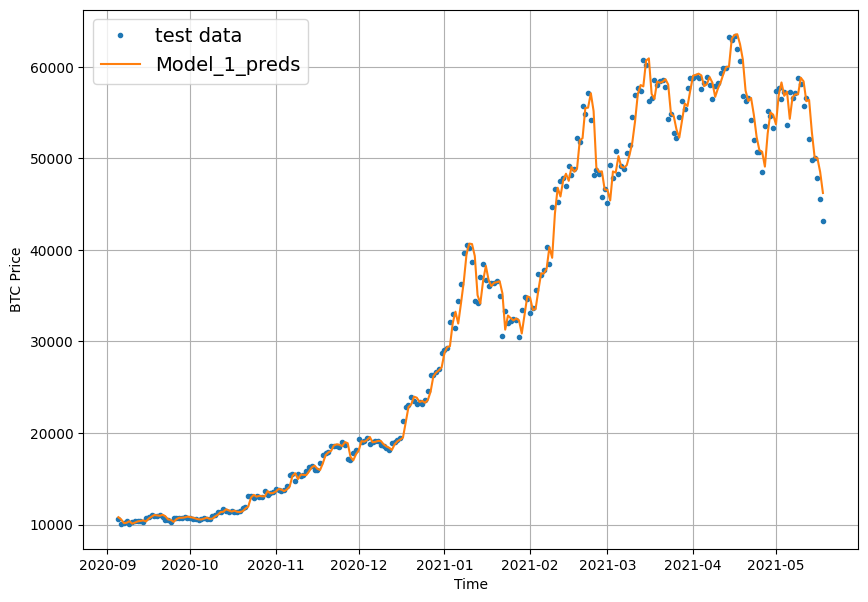

In [44]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_test[-len(test_window):],values=test_labels[:,0],start=offset,label="test data")
plot_time_series(timesteps=x_test[-len(test_window):],values=model_1_preds,start=offset,label="Model_1_preds",format="-")


In [45]:
HORIZON=1
WINDOW=30

In [46]:
# make window data
full_window,full_labels=make_windows(x=prices,window_size=WINDOW,horizon=HORIZON)

Window array [[  123.65499      125.455        108.58483    ...   192.75666
    197.4          196.02499   ]
 [  125.455        108.58483      118.67466    ...   197.4
    196.02499      198.04883   ]
 [  108.58483      118.67466      121.33866    ...   196.02499
    198.04883      198.93233   ]
 ...
 [63346.78903511 61965.7825981  60574.44472823 ... 49764.1320816
  50032.69313676 47885.62525472]
 [61965.7825981  60574.44472823 56850.83016569 ... 50032.69313676
  47885.62525472 45604.61575361]
 [60574.44472823 56850.83016569 56224.10158771 ... 47885.62525472
  45604.61575361 43144.47129086]]


In [47]:
len(full_window),len(full_labels)

(2757, 2757)

In [48]:
train_windows,test_windows,train_labels,test_labels=make_train_test_split(window=full_window,labels=full_labels,test_split=0.2)

In [49]:
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2205, 552, 2205, 552)

In [50]:
train_windows[:2],train_labels[:2]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499]]),
 array([[196.02499],
        [198.04883]]))

In [51]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(HORIZON,activation='linear')
],name="Model_2_dense"
)
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                )
model_2.fit(train_windows,train_labels,
            validation_data=(test_windows,test_labels),
            epochs=128,
            verbose=0,
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [52]:
model_2.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 463.2085 


843.0252075195312

In [53]:
model_2_loaded=tf.keras.models.load_model("model_experiments/Model_2_dense.keras")
model_2_eval=model_2_loaded.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 296.6440 


In [54]:
model_2_preds=make_preds(model_2_loaded,test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [55]:
model_2_results=evaluate_metrics(tf.squeeze(test_labels),model_2_preds)
model_2_results

{'mae': np.float32(583.37604),
 'mse': np.float32(1187898.0),
 'rmse': np.float32(1089.9073),
 'mape': np.float32(2.6432595),
 'mase': np.float32(1.0197469)}

In [56]:
model_1_results

{'mae': np.float32(566.384),
 'mse': np.float32(1162965.1),
 'rmse': np.float32(1078.4086),
 'mape': np.float32(2.542868),
 'mase': np.float32(0.99497974)}

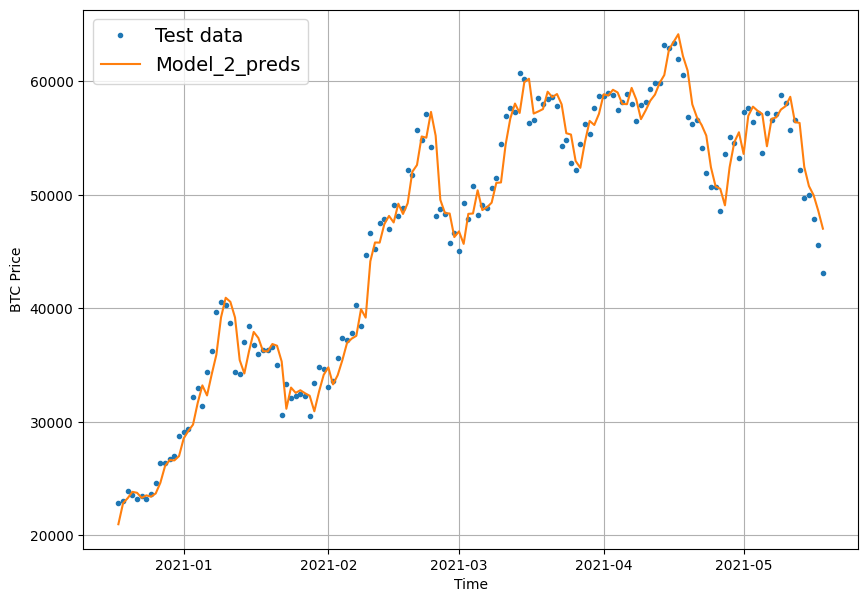

In [57]:
offset=400
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="Test data")
plot_time_series(timesteps=x_test[-len(test_windows):],values=model_2_preds,start=offset,label="Model_2_preds",format="-")

MODEL 3

In [58]:
WINDOW=30
HORIZON=7
full_windows,full_labels=make_windows(prices,window_size=WINDOW,horizon=HORIZON)

Window array [[  123.65499      125.455        108.58483    ...   210.3075
    225.02         248.25333   ]
 [  125.455        108.58483      118.67466    ...   225.02
    248.25333      262.32666   ]
 [  108.58483      118.67466      121.33866    ...   248.25333
    262.32666      294.48699   ]
 ...
 [58171.9090187  59295.95004401 59822.90167743 ... 49764.1320816
  50032.69313676 47885.62525472]
 [59295.95004401 59822.90167743 59853.19724227 ... 50032.69313676
  47885.62525472 45604.61575361]
 [59822.90167743 59853.19724227 63223.88439079 ... 47885.62525472
  45604.61575361 43144.47129086]]


In [59]:
full_windows.shape,full_labels.shape


((2751, 30), (2751, 7))

In [60]:
train_windows,test_windows,train_labels,test_labels=make_train_test_split(window=full_windows,labels=full_labels,test_split=0.2)

In [61]:
train_windows.shape,test_windows.shape,train_labels.shape,test_labels.shape

((2200, 30), (551, 30), (2200, 7), (551, 7))

In [62]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(HORIZON)
],name="Model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,train_labels,
            epochs=128,
            validation_data=(test_windows,test_labels),
            batch_size=128,
            verbose=1,
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/128
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2629.5928 - val_loss: 2955.5701
Epoch 2/128
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 640.7523 - val_loss: 2726.4670
Epoch 3/128
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 515.1049 - val_loss: 2190.9402
Epoch 4/128
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 448.2880 - val_loss: 2017.3521
Epoch 5/128
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 411.9039 - val_loss: 1900.6195
Epoch 6/128
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 376.3115 - val_loss: 1803.1514
Epoch 7/128
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 348.5100 - val_loss: 1652.2684
Epoch 8/128
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 329.7687 - val_loss: 1542.7788
Epoch 9/128
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 316.3641 - val_loss: 1499.9393
Epoch 10/128
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 303.3776 - val_loss: 1456.4646
Epoch 11/128
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 298.7779 - val_loss: 1461.5822
Epoch 

In [63]:
model_3.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 633.0210 


1216.998291015625

In [64]:
model_3_loaded=tf.keras.models.load_model("model_experiments/Model_3_dense.keras")

In [65]:
model_3_loaded.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 609.8830  


1204.3529052734375

In [66]:
model_3_preds=make_preds(model_3_loaded,test_windows)
model_3_preds

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<tf.Tensor: shape=(551, 7), dtype=float32, numpy=
array([[ 9426.898,  9537.592,  9351.854, ...,  9529.315,  9529.16 ,
         9378.504],
       [ 9166.779,  8927.821,  9077.494, ...,  9266.995,  9250.853,
         9059.132],
       [ 8944.015,  8727.334,  9023.232, ...,  9003.526,  9025.603,
         8892.747],
       ...,
       [57303.387, 58097.273, 58135.066, ..., 57559.98 , 58338.26 ,
        57658.25 ],
       [59522.582, 58252.35 , 58895.742, ..., 59353.777, 59677.66 ,
        59671.938],
       [56168.594, 56958.03 , 56552.17 , ..., 57951.64 , 57657.234,
        56173.355]], dtype=float32)>

In [67]:
model_3_preds.shape,model_2_preds.shape

(TensorShape([551, 7]), TensorShape([552]))

In [68]:

def evaluate_metrics(y_true,y_pred):
  y_true=tf.cast(y_true,dtype=tf.float32)
  y_pred=tf.cast(y_pred,dtype=tf.float32)

  mae=tf.keras.metrics.mae(y_true,y_pred)
  mse=tf.keras.metrics.mse(y_true,y_pred)
  rmse=tf.sqrt(mse)
  mape=tf.keras.metrics.mape(y_true,y_pred)
  mase=mean_absolute_scaled_error(y_true,y_pred)
  if mae.ndim>0:
    mae=tf.reduce_mean(mae)
    mse=tf.reduce_mean(mse)
    mape=tf.reduce_mean(mape)
    rmse=tf.reduce_mean(rmse)
    mase=tf.reduce_mean(mase)


  return {
      "mae":mae.numpy(),
      "mse":mse.numpy(),
      "rmse":rmse.numpy(),
      "mape":mape.numpy(),
      "mase":mase.numpy()
  }

In [69]:
model_3_results=evaluate_metrics(y_true=tf.squeeze(test_labels),y_pred=model_3_preds)
model_3_results

{'mae': np.float32(1204.3529),
 'mse': np.float32(5166653.5),
 'rmse': np.float32(1387.7944),
 'mape': np.float32(5.418618),
 'mase': np.float32(2.1430786)}

In [72]:
test_labels.shape

(551, 7)

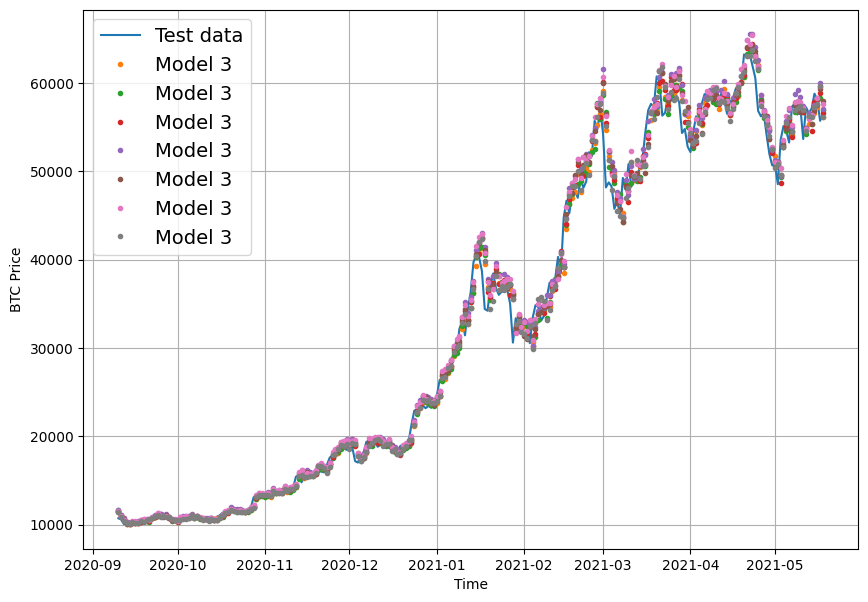

In [74]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_test[-len(test_windows):],values=test_labels[:,0],start=offset,format="-",label="Test data")
plot_time_series(timesteps=x_test[-len(test_windows):],values=model_3_preds,start=offset,label="Model 3")

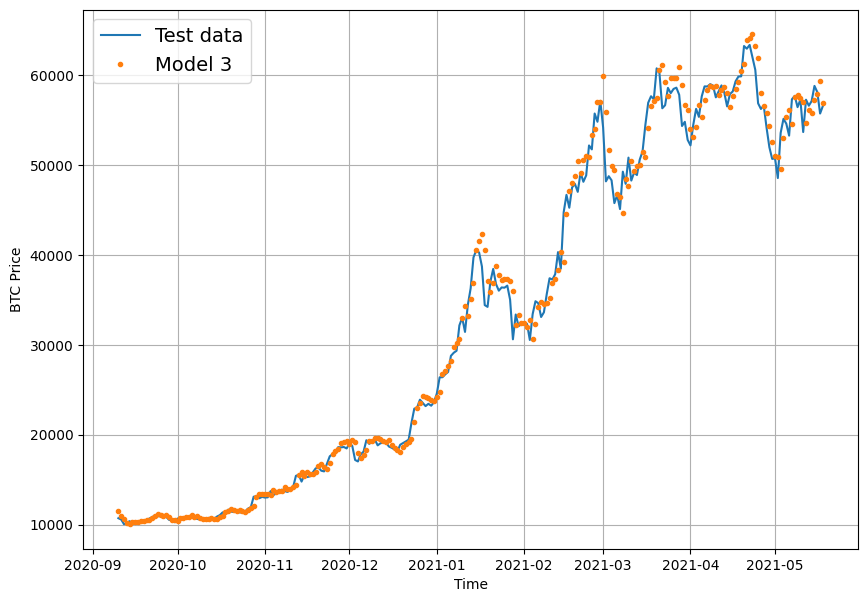

In [75]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_test[-len(test_windows):],values=test_labels[:,0],start=offset,format="-",label="Test data")
plot_time_series(timesteps=x_test[-len(test_windows):],values=tf.reduce_mean(model_3_preds,axis=1),start=offset,label="Model 3")

In [78]:
import pandas as pd
df=pd.DataFrame({"Naive":[naive_model_results['mae']],
                "Model 1":[model_1_results['mae']],
                "Model 2":[model_2_results['mae']],
                "Model 3":[model_3_results['mae']]}
                )

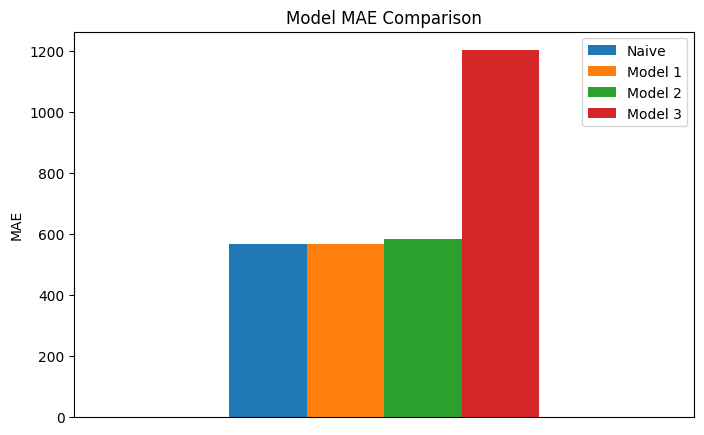

In [83]:
import matplotlib.pyplot as plt

df.plot(kind='bar', figsize=(8,5))
plt.title("Model MAE Comparison")
plt.ylabel("MAE")
plt.xticks([])  # Remove index label (0)
plt.show()
